In [1]:
from uk_covid19 import Cov19API
import pandas as pd 
import numpy as np


In [36]:
#define filters with lists, note: if you 
lad=[
    'areaType=ltla'
]# all LADs

uk=[
    'areaType=overview'
]

england=[
    'areaType=nation',
    'areaName=England'
]

wales=[
    'areaType=nation',
    'areaName=Wales',
    
]

In [41]:
#define structure with a dictionary
cases_and_deaths={
    'date': 'date',
    'areaName': 'areaName',
    'areaCode': 'areaCode',
    'newCasesByPublishDate':'newCasesByPublishDate',
    'newPillarOneTestsByPublishDate':'newPillarOneTestsByPublishDate',
    'newPillarTwoTestsByPublishDate':'newPillarTwoTestsByPublishDate',
    'newPillarThreeTestsByPublishDate': 'newPillarThreeTestsByPublishDate',
    'newPillarFourTestsByPublishDate':'newPillarFourTestsByPublishDate',
    'newDeathsByDeathDate': 'newDeathsByDeathDate'

}

In [42]:
api_lad=Cov19API(filters=lad, structure=cases_and_deaths)

In [44]:
data_lad=api_lad.get_dataframe()

In [45]:
data_lad.head()

,date,areaName,areaCode,newCasesByPublishDate,newPillarOneTestsByPublishDate,newPillarTwoTestsByPublishDate,newPillarThreeTestsByPublishDate,newPillarFourTestsByPublishDate,newDeathsByDeathDate
0,2021-01-21,Aberdeen City,S12000033,64,None,None,None,None,NaN
1,2021-01-20,Aberdeen City,S12000033,57,None,None,None,None,NaN
2,2021-01-19,Aberdeen City,S12000033,36,None,None,None,None,NaN
3,2021-01-18,Aberdeen City,S12000033,56,None,None,None,None,NaN
4,2021-01-17,Aberdeen City,S12000033,61,None,None,None,None,NaN


In [48]:
data_lad['total_tests'] = data_lad['newPillarOneTestsByPublishDate']+data_lad['newPillarTwoTestsByPublishDate']+data_lad['newPillarThreeTestsByPublishDate']+data_lad['newPillarFourTestsByPublishDate']

In [75]:
data_lad['normalised_cases'] = data_lad['newCasesByPublishDate']/data_lad['total_tests']

In [65]:
import plotly 
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected =True)

In [60]:
#plot England:
api_en=Cov19API(filters =england, structure=cases_and_deaths)
en=api_en.get_dataframe()
en.head()



,date,areaName,areaCode,newCasesByPublishDate,newPillarOneTestsByPublishDate,newPillarTwoTestsByPublishDate,newPillarThreeTestsByPublishDate,newPillarFourTestsByPublishDate,newDeathsByDeathDate
0,2021-01-21,England,E92000001,34371,NaN,NaN,NaN,None,NaN
1,2021-01-20,England,E92000001,35061,86016.0,479267.0,2842.0,None,352.0
2,2021-01-19,England,E92000001,30371,81113.0,432475.0,2506.0,None,865.0
3,2021-01-18,England,E92000001,34134,56356.0,450937.0,2993.0,None,1038.0
4,2021-01-17,England,E92000001,35263,51828.0,312290.0,636.0,None,1037.0


In [62]:
#transform date column to date
en['date']=pd.to_datetime(en['date'])

In [81]:
#get the week number of the data
en['Week_number']=en['date'].dt.week

In [90]:
#get 2020 deaths only
en_2020= en[en['date'].between('2020-01-01', '2020-12-31')]
en_2020.head()

,date,areaName,areaCode,newCasesByPublishDate,newPillarOneTestsByPublishDate,newPillarTwoTestsByPublishDate,newPillarThreeTestsByPublishDate,newPillarFourTestsByPublishDate,newDeathsByDeathDate,total_tests,normalised_cases,Week_number
21,2020-12-31,England,E92000001,49510,63969.0,375375.0,2974.0,None,759.0,NaN,NaN,53
22,2020-12-30,England,E92000001,43554,67992.0,279017.0,2448.0,None,740.0,NaN,NaN,53
23,2020-12-29,England,E92000001,47164,53771.0,228615.0,1959.0,None,693.0,NaN,NaN,53
24,2020-12-28,England,E92000001,36511,48095.0,270010.0,642.0,None,697.0,NaN,NaN,53
25,2020-12-27,England,E92000001,25619,45330.0,273600.0,588.0,None,687.0,NaN,NaN,52


In [100]:
en_2020_gp=en_2020.groupby('Week_number').agg({'newDeathsByDeathDate': sum})
en_2020_gp.columns= ['weekly_deaths']
en_2020_gp=en_2020_gp.reset_index()
en_2020_gp.head()

,Week_number,weekly_deaths
0,1,0.0
1,2,0.0
2,3,0.0
3,4,0.0
4,5,0.0


## How to normalise the cases per number of tests:

In [112]:
pillar_cols = ['newPillarOneTestsByPublishDate', 'newPillarTwoTestsByPublishDate', 'newPillarThreeTestsByPublishDate', 'newPillarFourTestsByPublishDate' ]

In [113]:
for col in pillar_cols:
    en[col]=en[col].replace(np.nan, 0)
        

In [148]:
en[pillar_cols]=en[pillar_cols].astype(float)

In [149]:
np.sum(en[pillar_cols], axis=1)

0           0.0
1      568125.0
2      516094.0
3      510286.0
4      364754.0
         ...   
380         0.0
381         0.0
382         0.0
383         0.0
384         0.0
Length: 385, dtype: float64

In [150]:
en['total_tests'] = np.sum(en[pillar_cols], axis=1)
en['normalised_cases'] = (en['newCasesByPublishDate']/en['total_tests'])*100

In [151]:
en.head()

,date,areaName,areaCode,newCasesByPublishDate,newPillarOneTestsByPublishDate,newPillarTwoTestsByPublishDate,newPillarThreeTestsByPublishDate,newPillarFourTestsByPublishDate,newDeathsByDeathDate,total_tests,normalised_cases,Week_number
0,2021-01-21,England,E92000001,34371,0.0,0.0,0.0,0.0,NaN,0.0,inf,3
1,2021-01-20,England,E92000001,35061,86016.0,479267.0,2842.0,0.0,352.0,568125.0,6.171353,3
2,2021-01-19,England,E92000001,30371,81113.0,432475.0,2506.0,0.0,865.0,516094.0,5.884781,3
3,2021-01-18,England,E92000001,34134,56356.0,450937.0,2993.0,0.0,1038.0,510286.0,6.689190,3
4,2021-01-17,England,E92000001,35263,51828.0,312290.0,636.0,0.0,1037.0,364754.0,9.667612,2


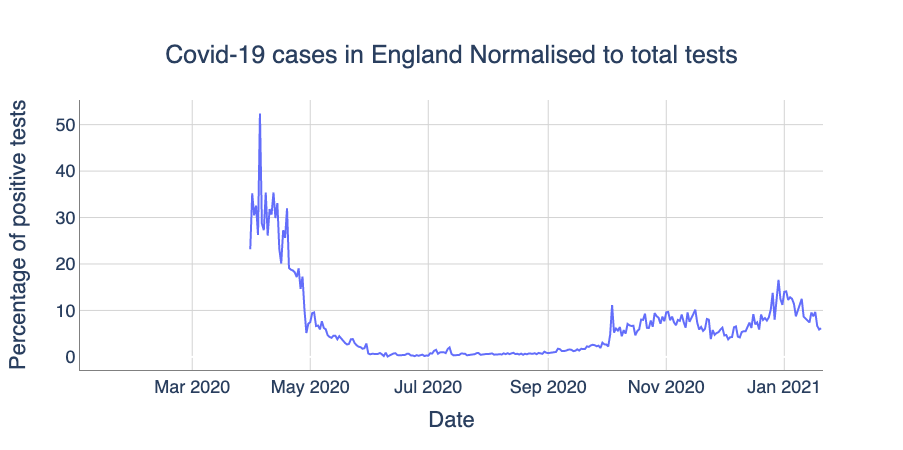

In [153]:

trace0=go.Scatter(
    x=en['date'],
    y=en['normalised_cases'],
    mode='lines',
    name='New Cases by publish Date'   
)

data=[trace0]
layout=go.Layout(title={'text': 'Covid-19 cases in England Normalised to total tests','y':0.9,'x':0.5,'xanchor': 'center',
        'yanchor': 'top'},
                 xaxis_title='Date',
                yaxis_title='Percentage of positive tests',
                font=dict(
        family="Helvetica",
        size=18,
        #color="blue"
                ),
        plot_bgcolor='rgb(255,255,255)',
                 )
fig=go.Figure(data=data, layout=layout)
fig.update_xaxes(showline=True, linewidth=1, linecolor='grey', gridcolor='lightgrey')
fig.update_yaxes(showline=True, linewidth=1, linecolor='grey', gridcolor='lightgrey')
iplot(fig)

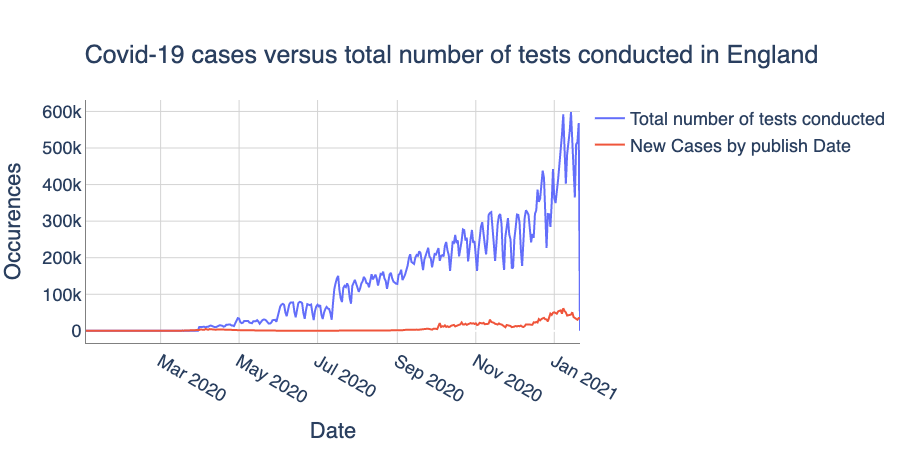

In [159]:
trace0=go.Scatter(
    x=en['date'],
    y=en['total_tests'],
    mode='lines',
    name='Total number of tests conducted',
)

trace1=go.Scatter(
    x=en['date'],
    y=en['newCasesByPublishDate'],
    mode='lines',
    name='New Cases by publish Date'   
)

data=[trace0, trace1]
layout=go.Layout(title={'text': 'Covid-19 cases versus total number of tests conducted in England ','y':0.9,'x':0.5,'xanchor': 'center',
        'yanchor': 'top'},
                 xaxis_title='Date',
                yaxis_title='Occurences',
                font=dict(
        family="Helvetica",
        size=18,
        #color="blue"
                ),
        plot_bgcolor='rgb(255,255,255)',
                 )
fig=go.Figure(data=data, layout=layout)
fig.update_xaxes(showline=True, linewidth=1, linecolor='grey', gridcolor='lightgrey')
fig.update_yaxes(showline=True, linewidth=1, linecolor='grey', gridcolor='lightgrey')
iplot(fig)

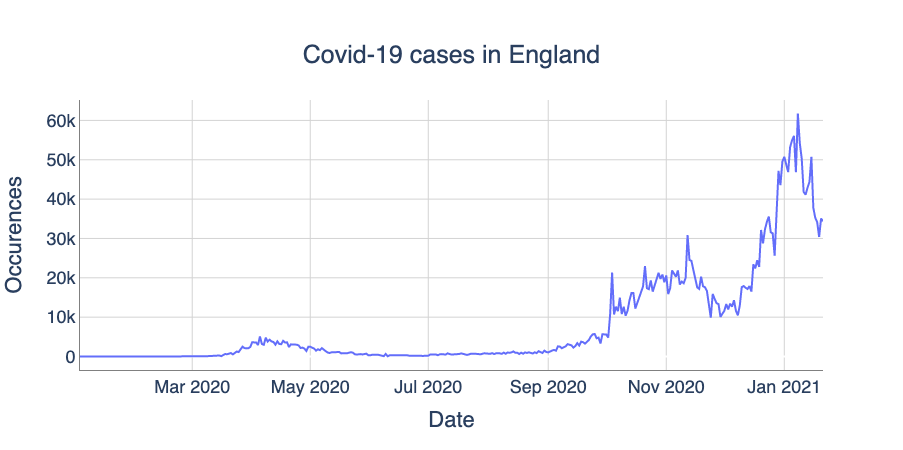

In [158]:

trace1=go.Scatter(
    x=en['date'],
    y=en['newCasesByPublishDate'],
    mode='lines',
    name='New Cases by publish Date'   
)

data=[trace1]
layout=go.Layout(title={'text': 'Covid-19 cases in England ','y':0.9,'x':0.5,'xanchor': 'center',
        'yanchor': 'top'},
                 xaxis_title='Date',
                yaxis_title='Occurences',
                font=dict(
        family="Helvetica",
        size=18,
        #color="blue"
                ),
        plot_bgcolor='rgb(255,255,255)',
                 )
fig=go.Figure(data=data, layout=layout)
fig.update_xaxes(showline=True, linewidth=1, linecolor='grey', gridcolor='lightgrey')
fig.update_yaxes(showline=True, linewidth=1, linecolor='grey', gridcolor='lightgrey')
iplot(fig)

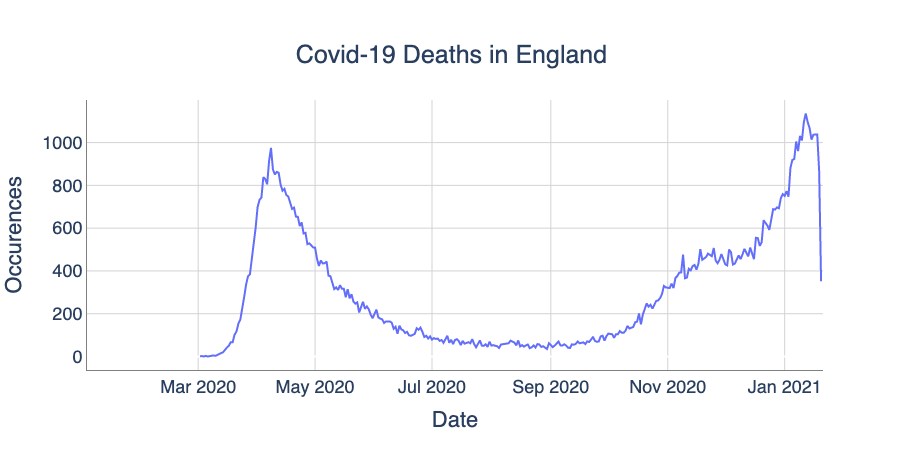

In [155]:


trace1=go.Scatter(
x=en['date'],
y=en['newDeathsByDeathDate'],
mode='lines',
name='New deaths by death date')
data=[ trace1]
layout=go.Layout(title={'text': 'Covid-19 Deaths in England','y':0.9,'x':0.5,'xanchor': 'center',
        'yanchor': 'top'},
                 xaxis_title='Date',
                yaxis_title='Occurences',
                font=dict(
        family="Helvetica",
        size=18,
        #color="blue"
                ),
        plot_bgcolor='rgb(255,255,255)',
                 )
fig=go.Figure(data=data, layout=layout)
fig.update_xaxes(showline=True, linewidth=1, linecolor='grey', gridcolor='lightgrey')
fig.update_yaxes(showline=True, linewidth=1, linecolor='grey', gridcolor='lightgrey')
iplot(fig)

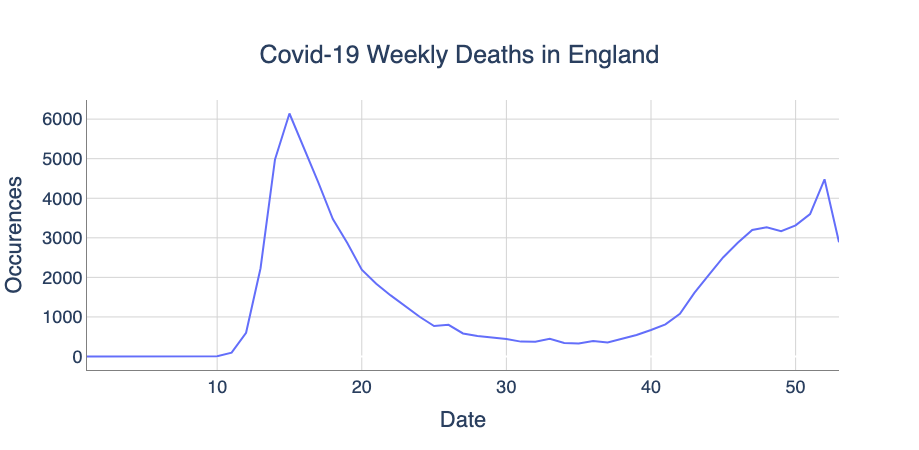

In [103]:
trace1=go.Scatter(
x=en_2020_gp['Week_number'],
y=en_2020_gp['weekly_deaths'],
mode='lines',
name='New deaths by death week')
data=[trace1]
layout=go.Layout(title={'text': 'Covid-19 Weekly Deaths in England','y':0.9,'x':0.5,'xanchor': 'center',
        'yanchor': 'top'},
                 xaxis_title='Date',
                yaxis_title='Occurences',
                font=dict(
        family="Helvetica",
        size=18,
        #color="blue"
                ),
        plot_bgcolor='rgb(255,255,255)',
                 )
fig=go.Figure(data=data, layout=layout)
fig.update_xaxes(showline=True, linewidth=1, linecolor='grey', gridcolor='lightgrey')
fig.update_yaxes(showline=True, linewidth=1, linecolor='grey', gridcolor='lightgrey')
iplot(fig)

In [70]:
#compare to the excess deaths 
excess=pd.read_csv('data/excess_deaths_uk_w51.csv')
eng_excess=excess[excess['Area_Name'] == 'England']

In [71]:
eng_excess.head()

,Area_Code,Area_Name,Week_Number,reg_deaths_15,reg_deaths_16,reg_deaths_17,reg_deaths_18,reg_deaths_19,avg_reg_deaths_15_19,reg_deaths_20,Excess_2020_from_avg,estimated_2019_pop,excess_deaths_per_100t_20
15963,E92000001,England,1,11527,12218,11229,11914,10208,11419.2,11443,23.8,56286961.0,0.042283
15964,E92000001,England,2,15163,10768,12869,14106,11764,12934.0,13088,154.0,56286961.0,0.273598
15965,E92000001,England,3,13908,10741,12753,13339,11151,12378.4,12197,-181.4,56286961.0,-0.322277
15966,E92000001,England,4,13087,10613,11985,13049,10977,11942.2,11105,-837.2,56286961.0,-1.487378
15967,E92000001,England,5,12079,10342,11726,12449,10525,11424.2,10868,-556.2,56286961.0,-0.988151


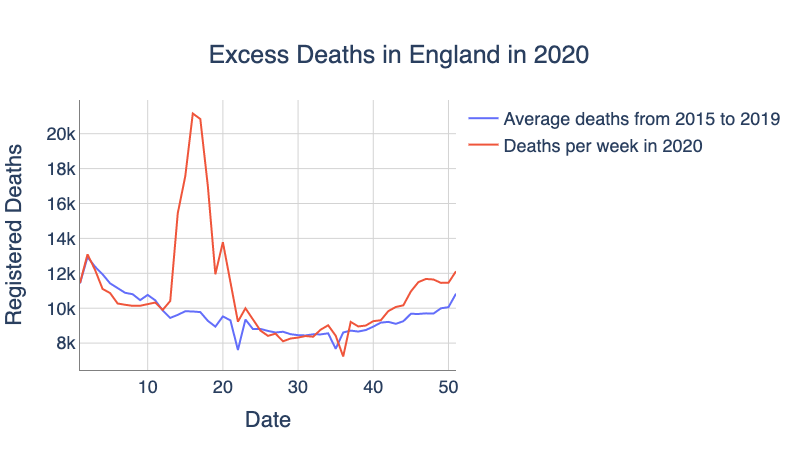

In [74]:
trace0= go.Scatter(
x=eng_excess['Week_Number'],
y=eng_excess['avg_reg_deaths_15_19'],
mode='lines',
name='Average deaths from 2015 to 2019'
)
trace1=go.Scatter(
x=eng_excess['Week_Number'],
y=eng_excess['reg_deaths_20'],
mode='lines',
name='Deaths per week in 2020')
data=[trace0, trace1]
layout=go.Layout(title={'text': 'Excess Deaths in England in 2020','y':0.9,'x':0.5,'xanchor': 'center',
        'yanchor': 'top'},
                 xaxis_title='Date',
                yaxis_title='Registered Deaths',
                font=dict(
        family="Helvetica",
        size=18,
        #color="blue"
                ),
        plot_bgcolor='rgb(255,255,255)',
                 )
fig=go.Figure(data=data, layout=layout)
fig.update_xaxes(showline=True, linewidth=1, linecolor='grey', gridcolor='lightgrey')
fig.update_yaxes(showline=True, linewidth=1, linecolor='grey', gridcolor='lightgrey')
iplot(fig)

In [104]:
eng_excess.columns

Index(['Area_Code', 'Area_Name', 'Week_Number', 'reg_deaths_15',
       'reg_deaths_16', 'reg_deaths_17', 'reg_deaths_18', 'reg_deaths_19',
       'avg_reg_deaths_15_19', 'reg_deaths_20', 'Excess_2020_from_avg',
       'estimated_2019_pop', 'excess_deaths_per_100t_20'],
      dtype='object')

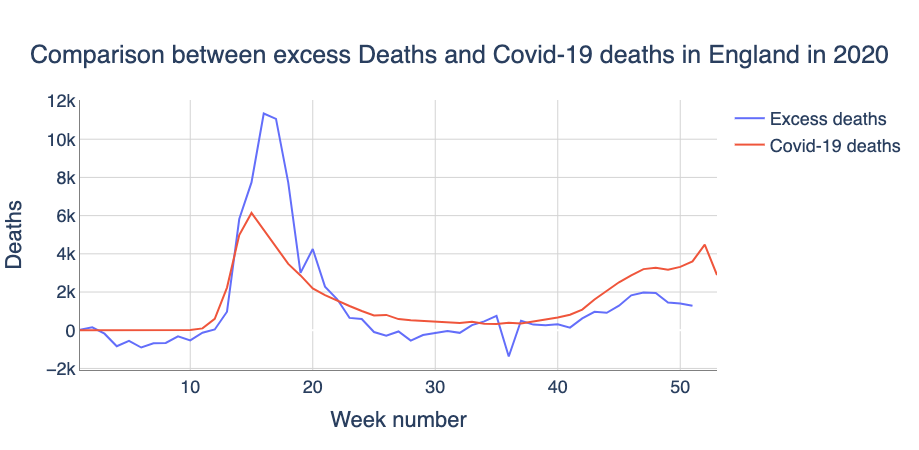

In [111]:
trace0= go.Scatter(
x=eng_excess['Week_Number'],
y=eng_excess['Excess_2020_from_avg'],
mode='lines',
name='Excess deaths'
)
trace1=go.Scatter(
x=en_2020_gp['Week_number'],
y=en_2020_gp['weekly_deaths'],
mode='lines',
name='Covid-19 deaths')
data=[trace0, trace1]
layout=go.Layout(title={'text': 'Comparison between excess Deaths and Covid-19 deaths in England in 2020','y':0.9,'x':0.5,'xanchor': 'center',
        'yanchor': 'top'},
                 xaxis_title='Week number',
                yaxis_title='Deaths',
                font=dict(
        family="Helvetica",
        size=18,
        #color="blue"
                ),
        plot_bgcolor='rgb(255,255,255)',
                 )
fig=go.Figure(data=data, layout=layout)
fig.update_xaxes(showline=True, linewidth=1, linecolor='grey', gridcolor='lightgrey')
fig.update_yaxes(showline=True, linewidth=1, linecolor='grey', gridcolor='lightgrey')
iplot(fig)